In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances

path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-0-1.fits'
tb = fits.open(path)
data = tb[1].data 

path2 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-05-15.fits'
tb2 = fits.open(path2)
data2 = tb2[1].data 

path3 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-1-2.fits'
tb3 = fits.open(path3)
data3 = tb3[1].data 

path4 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-15-25.fits'
tb4 = fits.open(path4)
data4 = tb4[1].data 

path5 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-2-3.fits'
tb5 = fits.open(path5)
data5 = tb5[1].data 

path6 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-25-35.fits'
tb6 = fits.open(path6)
data6 = tb6[1].data 

path7 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-3-4.fits'
tb7 = fits.open(path7)
data7 = tb7[1].data 

path8 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-35-45.fits'
tb8 = fits.open(path8)
data8 = tb8[1].data 


(array([2.284e+03, 4.100e+02, 1.070e+02, 2.800e+01, 1.000e+01, 7.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.55138185e-12, 3.93867101e-02, 7.87734202e-02, 1.18160130e-01,
        1.57546840e-01, 1.96933550e-01, 2.36320261e-01, 2.75706971e-01,
        3.15093681e-01, 3.54480391e-01, 3.93867101e-01]),
 <BarContainer object of 10 artists>)

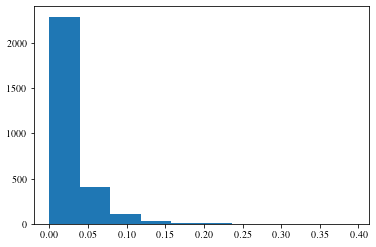

In [3]:
plt.hist(data3['s_knot'])

In [9]:
# pick out the knot, bar, and disc components in every bin

def get_L(data,threshold=0.8):
    
    knot_stars = (data['P_knot']>threshold)&(data['s_knot']<0.1)
    bar_stars = (data['P_bar']>threshold)&(data['s_bar']<0.1)
    disc_stars = (data['P_disc']>threshold)&(data['s_disc']<0.1)

    return np.dstack((data['Lx'][knot_stars],data['Ly'][knot_stars],data['Lz'][knot_stars]))[0],\
        np.dstack((data['Lx'][bar_stars],data['Ly'][bar_stars],data['Lz'][bar_stars]))[0],\
        np.dstack((data['Lx'][disc_stars],data['Ly'][disc_stars],data['Lz'][disc_stars]))[0]


In [10]:
def get_LxLyLz(data,threshold=0.8):
    
    knot_stars = (data['P_knot']>threshold)&(data['s_knot']<0.1)
    bar_stars = (data['P_bar']>threshold)&(data['s_bar']<0.1)
    disc_stars = (data['P_disc']>threshold)&(data['s_disc']<0.1)

    return data['Lx'][knot_stars],data['Ly'][knot_stars],data['Lz'][knot_stars],\
        data['Lx'][bar_stars],data['Ly'][bar_stars],data['Lz'][bar_stars],\
        data['Lx'][disc_stars],data['Ly'][disc_stars],data['Lz'][disc_stars]


In [36]:
def get_xyz(data,threshold=0.8):
    
    knot_stars = (data['P_knot']>threshold)&(data['s_knot']<0.1)
    bar_stars = (data['P_bar']>threshold)&(data['s_bar']<0.1)
    disc_stars = (data['P_disc']>threshold)&(data['s_disc']<0.1)

    return data['x'][knot_stars],data['y'][knot_stars],data['z'][knot_stars],\
        data['x'][bar_stars],data['y'][bar_stars],data['z'][bar_stars],\
        data['x'][disc_stars],data['y'][disc_stars],data['z'][disc_stars]

In [11]:
def get_ids(data,threshold=0.8):
    
    knot_stars = (data['P_knot']>threshold)&(data['s_knot']<0.1)
    bar_stars = (data['P_bar']>threshold)&(data['s_bar']<0.1)
    disc_stars = (data['P_disc']>threshold)&(data['s_disc']<0.1)

    return data['APOGEE_ID'][knot_stars],data['APOGEE_ID'][bar_stars],data['APOGEE_ID'][disc_stars]


In [33]:
def get_ids_all(data,threshold=0.):
    
    knot_stars = (data['P_knot']>threshold)
    bar_stars = (data['P_bar']>threshold)
    disc_stars = (data['P_disc']>threshold)

    return data['APOGEE_ID'][knot_stars],data['APOGEE_ID'][bar_stars],data['APOGEE_ID'][disc_stars]


In [39]:
Lxknot = []
Lxbar = []
Lxdisc = []
Lyknot = []
Lybar = []
Lydisc = []
Lzknot = []
Lzbar = []
Lzdisc = []

datas = [data,data2,data3,data4,data5,data6,data7,data8]

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    Lxknot0,Lyknot0,Lzknot0, Lxbar0,Lybar0,Lzbar0, Lxdisc0,Lydisc0,Lzdisc0 = get_LxLyLz(i)
    
    Lxknot.extend(Lxknot0)
    Lxbar.extend(Lxbar0)
    Lxdisc.extend(Lxdisc0)
    Lyknot.extend(Lyknot0)
    Lybar.extend(Lybar0)
    Lydisc.extend(Lydisc0)
    Lzknot.extend(Lzknot0)
    Lzbar.extend(Lzbar0)
    Lzdisc.extend(Lzdisc0)


0it [00:00, ?it/s]

In [40]:
xknot = []
xbar = []
xdisc = []
yknot = []
ybar = []
ydisc = []
zknot = []
zbar = []
zdisc = []

datas = [data,data2,data3,data4,data5,data6,data7,data8]

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    xknot0,yknot0,zknot0, xbar0,ybar0,zbar0, xdisc0,ydisc0,zdisc0 = get_xyz(i)
    
    xknot.extend(xknot0)
    xbar.extend(xbar0)
    xdisc.extend(xdisc0)
    yknot.extend(yknot0)
    ybar.extend(ybar0)
    ydisc.extend(ydisc0)
    zknot.extend(zknot0)
    zbar.extend(zbar0)
    zdisc.extend(zdisc0)

0it [00:00, ?it/s]

(-1500.0, 500.0)

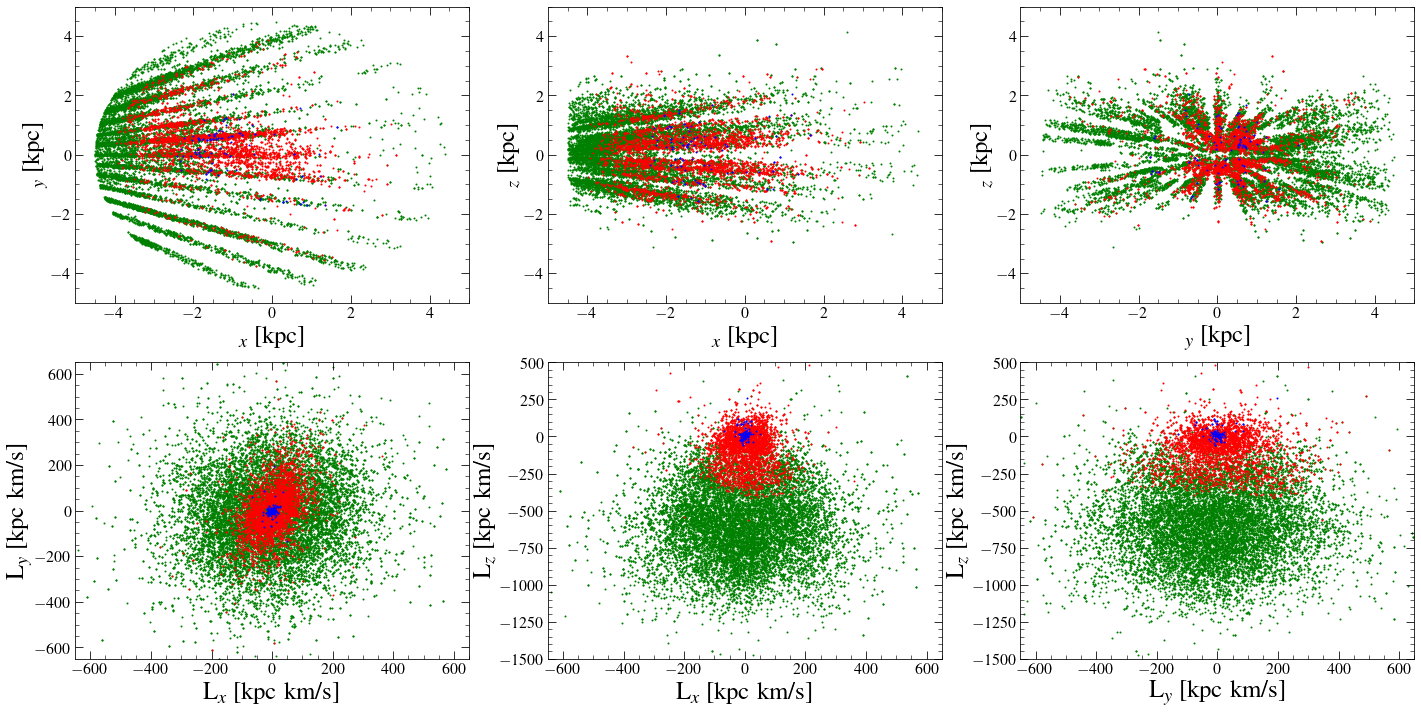

In [42]:
plt.figure(figsize=(24,12),facecolor='white')

plt.subplot(2,3,1)
plt.scatter(xdisc,ydisc,s=1,c='g')
plt.scatter(xbar,ybar,s=1,c='r')
plt.scatter(xknot,yknot,s=1,c='b')
plt.xlabel(r'$_{x}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{y}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,3,2)
plt.scatter(xdisc,zdisc,s=1,c='g')
plt.scatter(xbar,zbar,s=1,c='r')
plt.scatter(xknot,zknot,s=1,c='b')
plt.xlabel(r'$_{x}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{z}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,3,3)
plt.scatter(ydisc,zdisc,s=1,c='g')
plt.scatter(ybar,zbar,s=1,c='r')
plt.scatter(yknot,zknot,s=1,c='b')
plt.xlabel(r'$_{y}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{z}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)


plt.subplot(2,3,4)
plt.scatter(Lxdisc,Lydisc,s=1,c='g')
plt.scatter(Lxbar,Lybar,s=1,c='r')
plt.scatter(Lxknot,Lyknot,s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(2,3,5)
plt.scatter(Lxdisc,Lzdisc,s=1,c='g')
plt.scatter(Lxbar,Lzbar,s=1,c='r')
plt.scatter(Lxknot,Lzknot,s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(2,3,6)
plt.scatter(Lydisc,Lzdisc,s=1,c='g')
plt.scatter(Lybar,Lzbar,s=1,c='r')
plt.scatter(Lyknot,Lzknot,s=1,c='b')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)


In [43]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
#     if x.size != y.size:
#         raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [153]:
path_all = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/A17G3-innergal'
tb_all = fits.open(path_all)
data_all = tb_all[1].data 

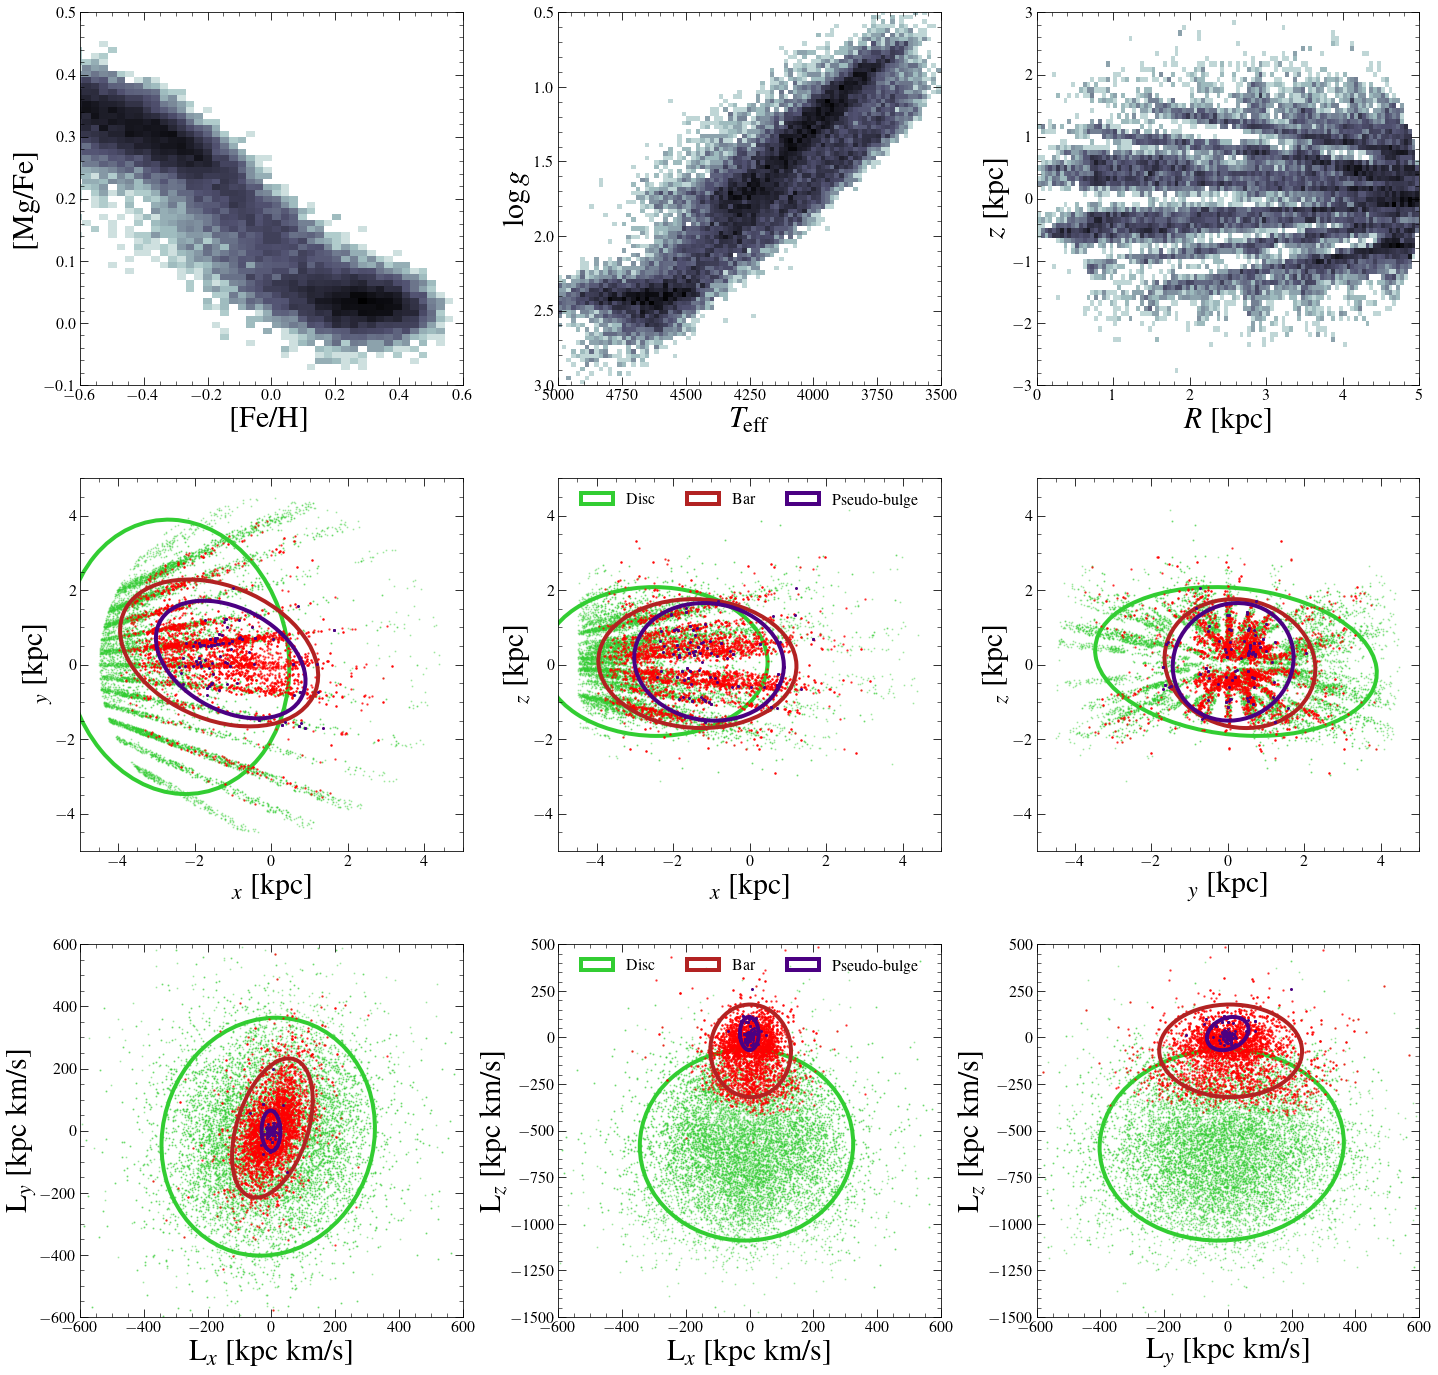

In [175]:
from matplotlib.colors import LogNorm
fig, ax_nstd = plt.subplots(3,3, figsize=(24,24),facecolor='white')

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5


# Mg-fe
ax_nstd[0,0].hist2d(data_all['FE_H'][data_all['MG_FE']>-10],data_all['MG_FE'][data_all['MG_FE']>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[0,0].set_xlabel(r'[Fe/H]',fontsize=30)
ax_nstd[0,0].set_ylabel(r'[Mg/Fe]',fontsize=30)
ax_nstd[0,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,0].minorticks_on()
ax_nstd[0,0].set_xlim(-0.6,0.6)
ax_nstd[0,0].set_ylim(-0.1,0.5)
# cb = ax_nstd[0,0].colorbar(orientation='horizontal',location='top')
# cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
# cb.ax.tick_params(labelsize=20)
# cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,orientation='horizontal',location='top')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
# cbar.ax.tick_params(labelsize=20,pad=1)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


# teff-logg
ax_nstd[0,1].hist2d(data_all['TEFF'][data_all['LOGG']>-10],data_all['LOGG'][data_all['LOGG']>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[0,1].set_xlabel(r'$T_{\mathrm{eff}}$',fontsize=30)
ax_nstd[0,1].set_ylabel(r'$\log g$',fontsize=30)
ax_nstd[0,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,1].minorticks_on()
ax_nstd[0,1].set_xlim(5000,3500)
ax_nstd[0,1].set_ylim(3,0.5)

# R-z
Rgal = data_all['Rgal']*8.178
Zgal = data_all['Zgal']*8.178

ax_nstd[0,2].hist2d(Rgal[Zgal>-10],Zgal[Zgal>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[0,2].set_xlabel(r'$R$ [kpc]',fontsize=30)
ax_nstd[0,2].set_ylabel(r'$z$ [kpc]',fontsize=30)
ax_nstd[0,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,2].minorticks_on()
ax_nstd[0,2].set_xlim(0.,5)
ax_nstd[0,2].set_ylim(-3,3)


# x-y
ax_nstd[1,0].scatter(xdisc,ydisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(xdisc,ydisc, ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,0].scatter(xbar,ybar,s=2,c='r',alpha=0.6)
confidence_ellipse(xbar,ybar, ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,0].scatter(xknot,yknot,s=4,c='indigo',alpha=1)
confidence_ellipse(xknot,yknot, ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,0].set_xlabel(r'$_{x}$ [kpc]',fontsize=30)
ax_nstd[1,0].set_ylabel(r'$_{y}$ [kpc]',fontsize=30)
ax_nstd[1,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,0].minorticks_on()
ax_nstd[1,0].set_xlim(-5,5)
ax_nstd[1,0].set_ylim(-5,5)

# x-z
ax_nstd[1,1].scatter(xdisc,zdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(xdisc,zdisc, ax_nstd[1,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,1].scatter(xbar,zbar,s=2,c='r',alpha=0.6)
confidence_ellipse(xbar,zbar, ax_nstd[1,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,1].scatter(xknot,zknot,s=4,c='indigo',alpha=1)
confidence_ellipse(xknot,zknot, ax_nstd[1,1], n_std=2,
                   label=r'Pseudo-bulge', edgecolor='indigo',lw=4)
ax_nstd[1,1].set_xlabel(r'$_{x}$ [kpc]',fontsize=30)
ax_nstd[1,1].set_ylabel(r'$_{z}$ [kpc]',fontsize=30)
ax_nstd[1,1].legend(loc='upper center',frameon=False,fontsize=16,ncol=3)
ax_nstd[1,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,1].minorticks_on()
ax_nstd[1,1].set_xlim(-5,5)
ax_nstd[1,1].set_ylim(-5,5)

# y-z
ax_nstd[1,2].scatter(ydisc,zdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(ydisc,zdisc, ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,2].scatter(ybar,zbar,s=2,c='r',alpha=0.6)
confidence_ellipse(ybar,zbar, ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,2].scatter(yknot,zknot,s=4,c='indigo',alpha=1)
confidence_ellipse(yknot,zknot, ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,2].set_xlabel(r'$_{y}$ [kpc]',fontsize=30)
ax_nstd[1,2].set_ylabel(r'$_{z}$ [kpc]',fontsize=30)
ax_nstd[1,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,2].minorticks_on()
ax_nstd[1,2].set_xlim(-5,5)
ax_nstd[1,2].set_ylim(-5,5)

# lx-ly
ax_nstd[2,0].scatter(Lxdisc,Lydisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lxdisc,Lydisc, ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,0].scatter(Lxbar,Lybar,s=2,c='r',alpha=0.6)
confidence_ellipse(Lxbar,Lybar, ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,0].scatter(Lxknot,Lyknot,s=4,c='indigo',alpha=1)
confidence_ellipse(Lxknot,Lyknot, ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,0].set_xlabel(r'L$_{x}$ [kpc km/s]',fontsize=30)
ax_nstd[2,0].set_ylabel(r'L$_{y}$ [kpc km/s]',fontsize=30)
ax_nstd[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,0].minorticks_on()
ax_nstd[2,0].set_xlim(-600,600)
ax_nstd[2,0].set_ylim(-600,600)

# lx-lz
ax_nstd[2,1].scatter(Lxdisc,Lzdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lxdisc,Lzdisc, ax_nstd[2,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,1].scatter(Lxbar,Lzbar,s=2,c='r',alpha=0.6)
confidence_ellipse(Lxbar,Lzbar, ax_nstd[2,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,1].scatter(Lxknot,Lzknot,s=4,c='indigo',alpha=1)
confidence_ellipse(Lxknot,Lzknot, ax_nstd[2,1], n_std=2,
                   label=r'Pseudo-bulge', edgecolor='indigo',lw=4)
ax_nstd[2,1].set_xlabel(r'L$_{x}$ [kpc km/s]',fontsize=30)
ax_nstd[2,1].set_ylabel(r'L$_{z}$ [kpc km/s]',fontsize=30)
ax_nstd[2,1].legend(loc='upper center',frameon=False,fontsize=16,ncol=3)
ax_nstd[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,1].minorticks_on()
ax_nstd[2,1].set_xlim(-600,600)
ax_nstd[2,1].set_ylim(-1500,500)

# ly-lz
ax_nstd[2,2].scatter(Lydisc,Lzdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lydisc,Lzdisc, ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,2].scatter(Lybar,Lzbar,s=2,c='r',alpha=0.6)
confidence_ellipse(Lybar,Lzbar, ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,2].scatter(Lyknot,Lzknot,s=4,c='indigo',alpha=1)
confidence_ellipse(Lyknot,Lzknot, ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,2].set_xlabel(r'L$_{y}$ [kpc km/s]',fontsize=30)
ax_nstd[2,2].set_ylabel(r'L$_{z}$ [kpc km/s]',fontsize=30)
ax_nstd[2,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,2].minorticks_on()
ax_nstd[2,2].set_xlim(-600,600)
ax_nstd[2,2].set_ylim(-1500,500)

plt.subplots_adjust(wspace=0.25,hspace=0.25)
plt.savefig('../plots-paper/summary.pdf',dpi=600,fmt='pdf', rasterized=True)
plt.show()


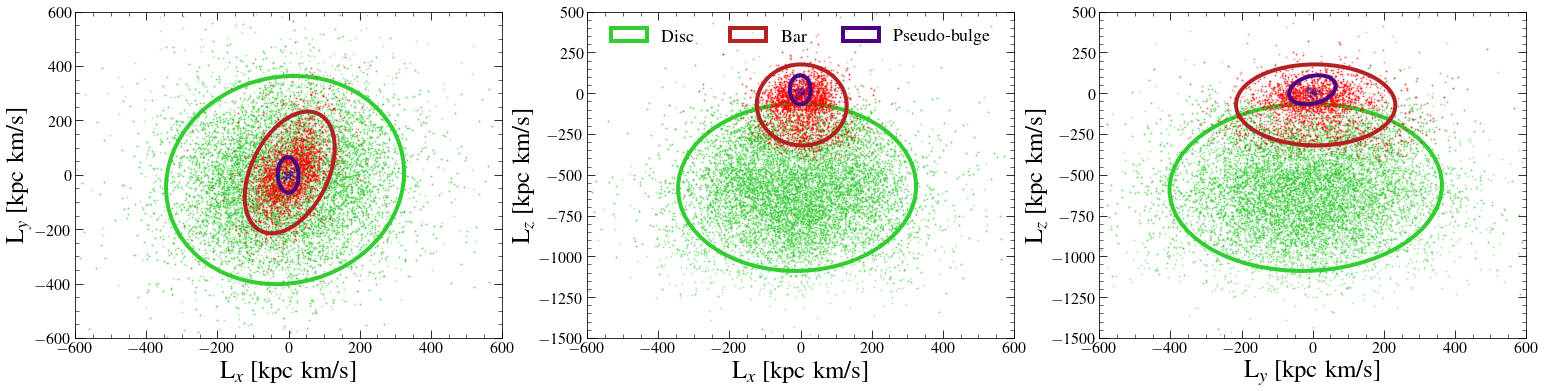

In [46]:
fig, ax_nstd = plt.subplots(1,3, figsize=(26,6),facecolor='white')

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5


# lx-ly
ax_nstd[0].scatter(Lxdisc,Lydisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[0].scatter(Lxbar,Lybar,s=1,c='r',alpha=0.3)
confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[0].scatter(Lxknot,Lyknot,s=1,c='indigo',alpha=0.3)
confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[0].set_xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
ax_nstd[0].set_ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
ax_nstd[0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0].minorticks_on()
ax_nstd[0].set_xlim(-600,600)
ax_nstd[0].set_ylim(-600,600)

# lx-lz
ax_nstd[1].scatter(Lxdisc,Lzdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lxdisc,Lzdisc, ax_nstd[1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1].scatter(Lxbar,Lzbar,s=1,c='r',alpha=0.3)
confidence_ellipse(Lxbar,Lzbar, ax_nstd[1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1].scatter(Lxknot,Lzknot,s=1,c='indigo',alpha=0.3)
confidence_ellipse(Lxknot,Lzknot, ax_nstd[1], n_std=2,
                   label=r'Pseudo-bulge', edgecolor='indigo',lw=4)
ax_nstd[1].set_xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
ax_nstd[1].set_ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
ax_nstd[1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1].minorticks_on()
ax_nstd[1].set_xlim(-600,600)
ax_nstd[1].set_ylim(-1500,500)

# ly-lz
ax_nstd[2].scatter(Lydisc,Lzdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lydisc,Lzdisc, ax_nstd[2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2].scatter(Lybar,Lzbar,s=1,c='r',alpha=0.3)
confidence_ellipse(Lybar,Lzbar, ax_nstd[2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2].scatter(Lyknot,Lzknot,s=1,c='indigo',alpha=0.3)
confidence_ellipse(Lyknot,Lzknot, ax_nstd[2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2].set_xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
ax_nstd[2].set_ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
ax_nstd[2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2].minorticks_on()
ax_nstd[2].set_xlim(-600,600)
ax_nstd[2].set_ylim(-1500,500)


plt.show()


# Plot the Mg-Fe plane

In [16]:
idsknot = []
idsbar = []
idsdisc = []

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    idsknot0,idsbar0,idsdisc0= get_ids(i)
    
    idsknot.extend(idsknot0)
    idsbar.extend(idsbar0)
    idsdisc.extend(idsdisc0)
    

0it [00:00, ?it/s]

In [34]:
idsknot_all = []
idsbar_all = []
idsdisc_all = []

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    idsknot0,idsbar0,idsdisc0= get_ids_all(i)
    
    idsknot.extend(idsknot0)
    idsbar.extend(idsbar0)
    idsdisc.extend(idsdisc0)
    

0it [00:00, ?it/s]

In [63]:
path_m = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb_m = fits.open(path_m)
data_m = tb_m[1].data 

In [18]:
mask_knot = np.isin(data_m['APOGEE_ID_1'],idsknot)
mask_bar = np.isin(data_m['APOGEE_ID_1'],idsbar)
mask_disc = np.isin(data_m['APOGEE_ID_1'],idsdisc)

In [35]:
mask_knot_all = np.isin(data_m['APOGEE_ID_1'],idsknot_all)
mask_bar_all = np.isin(data_m['APOGEE_ID_1'],idsbar_all)
mask_disc_all = np.isin(data_m['APOGEE_ID_1'],idsdisc_all)

Text(0, 0.5, 'logg')

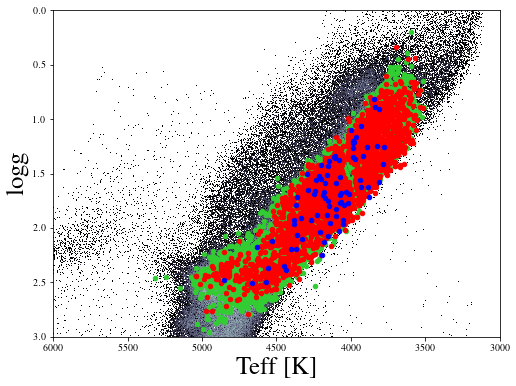

In [19]:
from matplotlib.colors import LogNorm
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<6000)&(data_m['LOGG']>0)&(data_m['LOGG']<3)

plt.figure(figsize=(8,6),facecolor='white')
plt.hist2d(data_m['TEFF'][mask_tl],data_m['LOGG'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['TEFF'][mask_disc],data_m['LOGG'][mask_disc],c='limegreen',s=20)
plt.scatter(data_m['TEFF'][mask_bar],data_m['LOGG'][mask_bar],c='r',s=20)
plt.scatter(data_m['TEFF'][mask_knot],data_m['LOGG'][mask_knot],c='b',s=20)
plt.xlim(6000,3000)
plt.ylim(3,0)
plt.xlabel('Teff [K]',fontsize=25)
plt.ylabel('logg',fontsize=25)


Text(0, 0.5, '[N/Fe]')

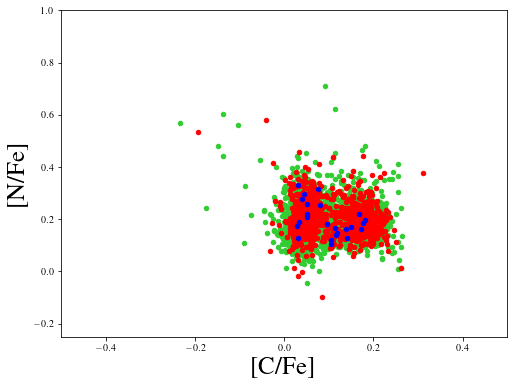

In [20]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<4750)&(data_m['LOGG']>0)&(data_m['LOGG']<1.5)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['C_FE'][mask_disc&mask_tl],data_m['N_FE'][mask_disc&mask_tl],c='limegreen',s=20)
plt.scatter(data_m['C_FE'][mask_bar&mask_tl],data_m['N_FE'][mask_bar&mask_tl],c='r',s=20)
plt.scatter(data_m['C_FE'][mask_knot&mask_tl],data_m['N_FE'][mask_knot&mask_tl],c='b',s=20)
plt.xlim(-0.5,0.5)
plt.ylim(-0.25,1.)
plt.xlabel('[C/Fe]',fontsize=25)
plt.ylabel('[N/Fe]',fontsize=25)


In [21]:
no = data_m['N_FE']-data_m['O_FE']
mgmn =data_m['MG_FE']-data_m['MN_FE']

# log(x/y) = log(x)-log(y)  


Text(0, 0.5, '[N/O]')

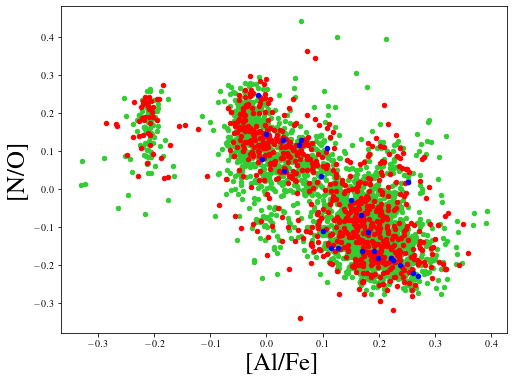

In [22]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<4750)&(data_m['LOGG']>0)&(data_m['LOGG']<1.5)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['AL_FE'][mask_disc&mask_tl],no[mask_disc&mask_tl],c='limegreen',s=20)
plt.scatter(data_m['AL_FE'][mask_bar&mask_tl],no[mask_bar&mask_tl],c='r',s=20)
plt.scatter(data_m['AL_FE'][mask_knot&mask_tl],no[mask_knot&mask_tl],c='b',s=20)
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.25,1.)
plt.xlabel('[Al/Fe]',fontsize=25)
plt.ylabel('[N/O]',fontsize=25)


Text(0, 0.5, '[Mg/Mn]')

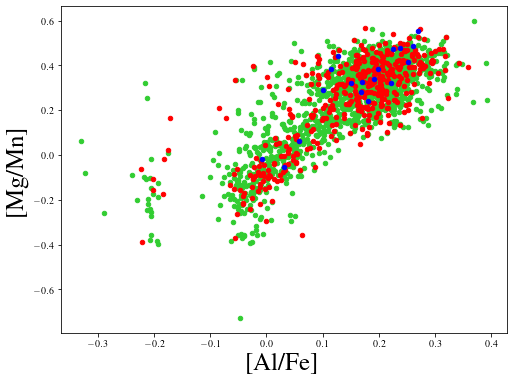

In [23]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<4750)&(data_m['LOGG']>0)&(data_m['LOGG']<1.5)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['AL_FE'][mask_disc&mask_tl],mgmn[mask_disc&mask_tl],c='limegreen',s=20)
plt.scatter(data_m['AL_FE'][mask_bar&mask_tl],mgmn[mask_bar&mask_tl],c='r',s=20)
plt.scatter(data_m['AL_FE'][mask_knot&mask_tl],mgmn[mask_knot&mask_tl],c='b',s=20)
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.25,1.)
plt.xlabel('[Al/Fe]',fontsize=25)
plt.ylabel('[Mg/Mn]',fontsize=25)


Text(0, 0.5, '[Mg/Mn]')

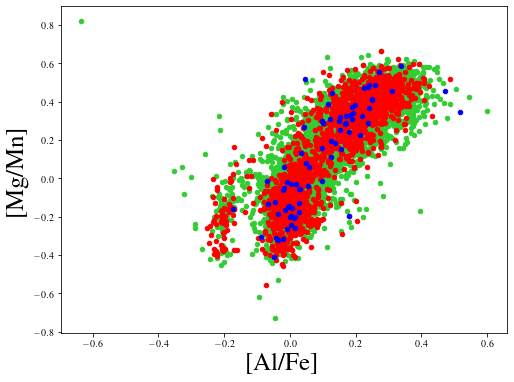

In [24]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<6000)&(data_m['LOGG']>0)&(data_m['LOGG']<3)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['AL_FE'][mask_disc],mgmn[mask_disc],c='limegreen',s=20)
plt.scatter(data_m['AL_FE'][mask_bar],mgmn[mask_bar],c='r',s=20)
plt.scatter(data_m['AL_FE'][mask_knot],mgmn[mask_knot],c='b',s=20)
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.25,1.)
plt.xlabel('[Al/Fe]',fontsize=25)
plt.ylabel('[Mg/Mn]',fontsize=25)


# Compute the Tinsley diagram for the different components

In [71]:
path_all = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-all.fits'
tb_all = fits.open(path_all)
data_all = tb_all[1].data 

In [116]:
def plot_weighted_2d(xs,ys,weights,cmap='Greens',label='pseudo-bulge'):
    nbins = 20
    # compute the weighted 2d histogram
    xlin = np.linspace(-0.6,0.8,21)
    ylin = np.linspace(-0.1,0.4,11)
    hist, xedges, yedges = np.histogram2d(-xs, ys, bins=[xlin,ylin], weights=weights)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    hist = np.flipud(np.rot90(hist))

    plt.imshow(hist, extent=extent,cmap=cmap)
    plt.text(0.2,0.3,label,fontsize=18)
    plt.xlabel(r'[Fe/H]',fontsize=25)
    plt.ylabel(r'[Mg/Fe]',fontsize=25)
    plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
    plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
    plt.minorticks_on()
    plt.xlim(-0.6,0.8)
    plt.ylim(-0.1,0.4)
    plt.colorbar()
    plt.show()

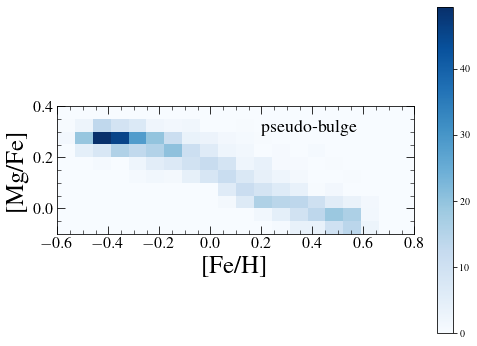

In [117]:
plt.figure(figsize=(8,6),facecolor='white')
plot_weighted_2d(data_all['FE_H'],data_all['MG_FE'],data_all['P_knot'],cmap='Blues')


# # plt.subplot(1,3,2)
# plot_weighted_2d(data_all['FE_H'],data_all['MG_FE'],data_all['P_bar'],cmap='Reds',label='bar')
# plt.xlabel(r'[Fe/H]',fontsize=25)
# # plt.ylabel(r'[Mg/Fe]',fontsize=25)
# # plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# # plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# # plt.minorticks_on()
# # plt.xlim(-0.6,0.8)
# # plt.ylim(-0.1,0.4)

# # plt.subplot(1,3,3)
# plot_weighted_2d(data_all['FE_H'],data_all['MG_FE'],data_all['P_disc'],cmap='Greens',label='disc')
# # plt.xlabel(r'[Fe/H]',fontsize=25)
# # # plt.ylabel(r'[Mg/Fe]',fontsize=25)
# # plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# # plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# # plt.minorticks_on()
# # plt.xlim(-0.6,0.8)
# # plt.ylim(-0.1,0.4)


In [119]:
zgal2 = data_m['Zgal']*8.178


fe_all = data_m['FE_H'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_all = data_m['MG_FE'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_all = np.array([fe_all,mg_all])

fe_knot = data_m['FE_H'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_knot = data_m['MG_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data_m['FE_H'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_bar = data_m['MG_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data_m['FE_H'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_disc = data_m['MG_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_disc = np.array([fe_disc,mg_disc])


In [120]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


In [121]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data_m['Zgal']*8.178
Rgal2 = data_m['Rgal']*8.178
fe_disc_solar = data_m['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
mg_disc_solar = data_m['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])
mask_solar = (Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)


In [122]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


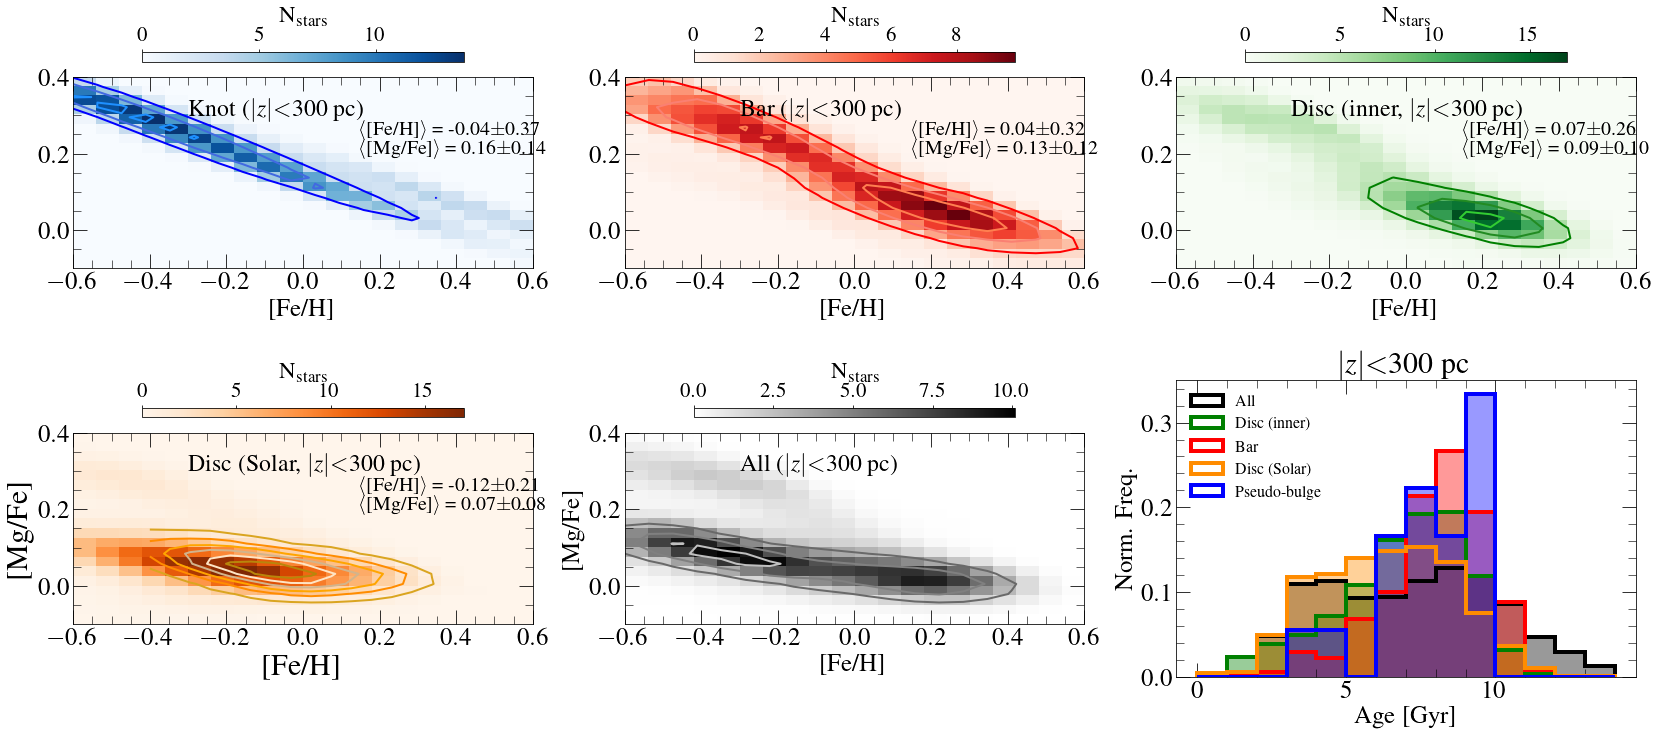

In [124]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(2, 3,figsize=(28,12),facecolor='white')


# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0,0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.6, 0.6,-0.1, 0.4])
axes[0,0].text(-0.3,0.3,'Knot ($|z|$$<$300 pc)',fontsize=24)
axes[0,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,0].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[0,1].text(-0.3,0.3,'Bar ($|z|$$<$300 pc)',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[0,1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.6, 0.6,-0.1, 0.4])
axes[0,1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,1].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,1].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[0,2].text(-0.3,0.3,'Disc (inner, $|z|$$<$300 pc)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[0,2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.6, 0.6,-0.1, 0.4])
axes[0,2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[0,2].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,2].minorticks_on()

cax = axes[0,2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[0,2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

axes[1,0].text(-0.3,0.3,'Disc (Solar, $|z|$$<$300 pc)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.6, 0.6,-0.1, 0.4])
axes[1,0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_solar])),fontsize=20)
axes[1,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_solar])),fontsize=20)
axes[1,0].set_xlabel('[Fe/H]',fontsize=30)
axes[1,0].set_ylabel('[Mg/Fe]',fontsize=30)
axes[1,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,1].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.6, 0.6,-0.1, 0.4])
axes[1,1].text(-0.3,0.3,'All ($|z|$$<$300 pc)',fontsize=24)
axes[1,1].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,1].set_xlabel('[Fe/H]',fontsize=25)
axes[1,1].set_ylabel('[Mg/Fe]',fontsize=25)
axes[1,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

bins_feh = np.linspace(0,14,15)
mask_all = (data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)
axes[1,2].set_title(r'$|z|$$<$300 pc',fontsize=30)
axes[1,2].hist(data_m['age_lowess_correct'][mask_all&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='k',lw=4,density=True,label='All')
axes[1,2].hist(data_m['age_lowess_correct'][mask_all&(np.abs(zgal2)<0.3)],bins=bins_feh,color='k',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_disc&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='g',lw=4,density=True,label='Disc (inner)')
axes[1,2].hist(data_m['age_lowess_correct'][mask_disc&(np.abs(zgal2)<0.3)],bins=bins_feh,color='g',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_bar&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='r',lw=4,density=True,label='Bar')
axes[1,2].hist(data_m['age_lowess_correct'][mask_bar&(np.abs(zgal2)<0.3)],bins=bins_feh,color='r',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_solar&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='darkorange',lw=4,density=True,label='Disc (Solar)')
axes[1,2].hist(data_m['age_lowess_correct'][mask_solar&(np.abs(zgal2)<0.3)],bins=bins_feh,color='darkorange',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_knot&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='b',lw=4,density=True,label='Pseudo-bulge')
axes[1,2].hist(data_m['age_lowess_correct'][mask_knot&(np.abs(zgal2)<0.3)],bins=bins_feh,color='b',alpha=0.4,density=True)
axes[1,2].set_xlabel('Age [Gyr]',fontsize=25)
axes[1,2].set_ylabel('Norm. Freq.',fontsize=25)
axes[1,2].legend(loc='upper left',frameon=False,fontsize=16)
axes[1,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,2].minorticks_on()



In [239]:
zgal2 = data_m['Zgal']*8.178


fe_all = data_m['FE_H'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_all = data_m['MG_FE'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_all = np.array([fe_all,mg_all])

fe_knot = data_m['FE_H'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_knot = data_m['MG_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data_m['FE_H'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_bar = data_m['MG_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data_m['FE_H'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_disc = data_m['MG_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_disc = np.array([fe_disc,mg_disc])


In [240]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


In [241]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data_m['Zgal']*8.178
Rgal2 = data_m['Rgal']*8.178
fe_disc_solar = data_m['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)]
mg_disc_solar = data_m['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])
mask_solar = (Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)


In [242]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


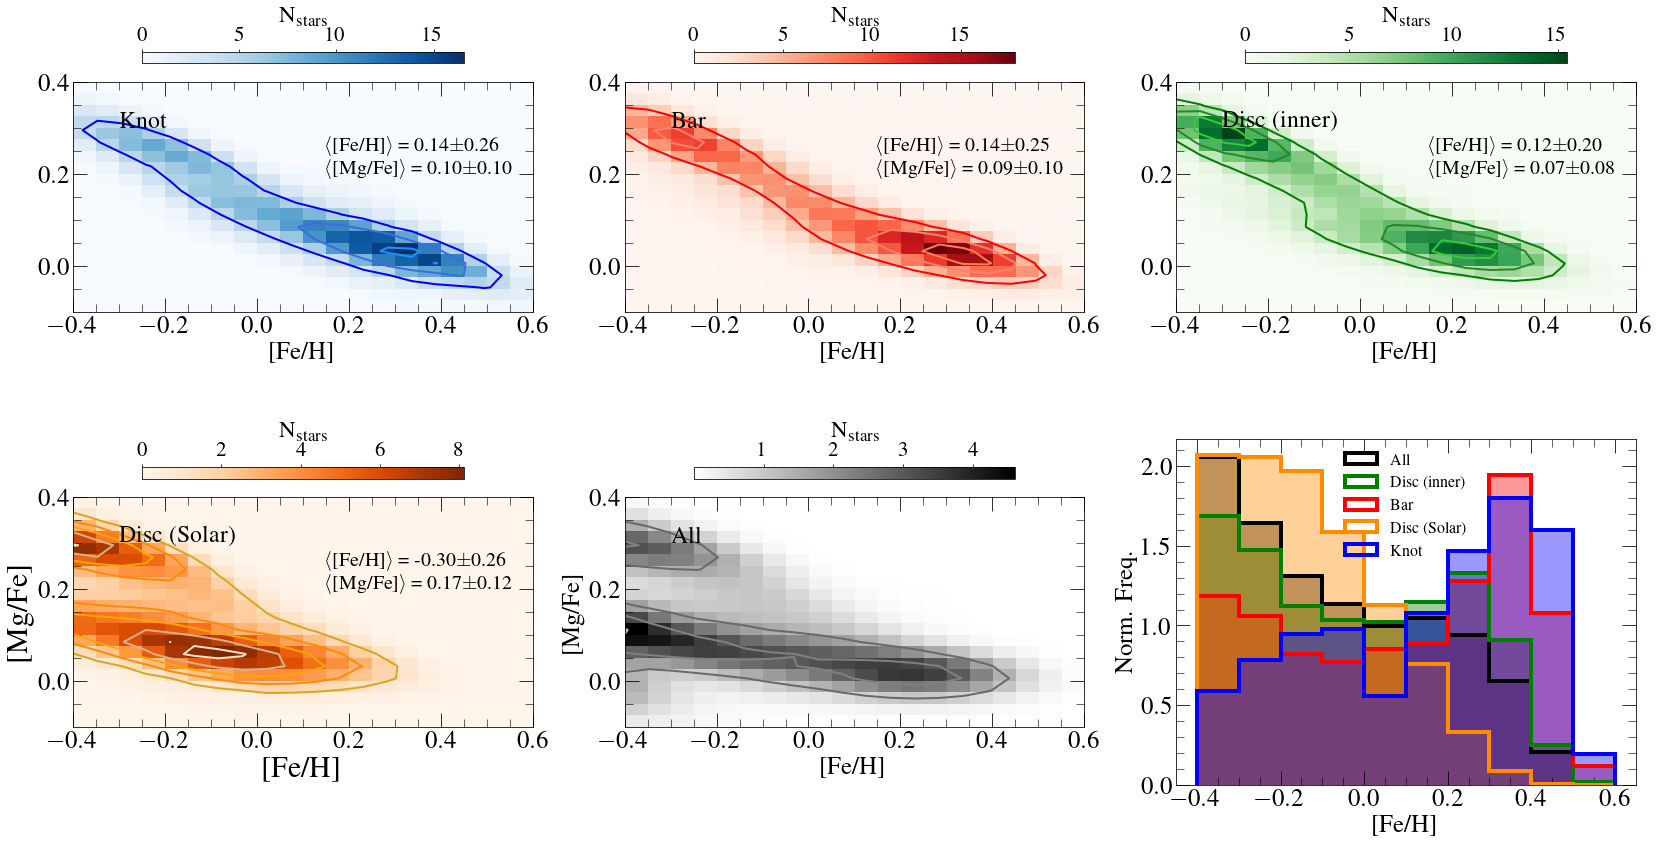

In [245]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(2, 3,figsize=(28,14),facecolor='white')


# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0,0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,0].text(-0.3,0.3,'Knot',fontsize=24)
axes[0,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,0].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[0,1].text(-0.3,0.3,'Bar',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[0,1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,1].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,1].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[0,2].text(-0.3,0.3,'Disc (inner)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[0,2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[0,2].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,2].minorticks_on()

cax = axes[0,2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[0,2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

axes[1,0].text(-0.3,0.3,'Disc (Solar)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_solar])),fontsize=20)
axes[1,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_solar])),fontsize=20)
axes[1,0].set_xlabel('[Fe/H]',fontsize=30)
axes[1,0].set_ylabel('[Mg/Fe]',fontsize=30)
axes[1,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,1].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,1].text(-0.3,0.3,'All',fontsize=24)
axes[1,1].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,1].set_xlabel('[Fe/H]',fontsize=25)
axes[1,1].set_ylabel('[Mg/Fe]',fontsize=25)
axes[1,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

bins_feh = np.linspace(-0.4,0.6,11)
mask_all = (data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)
# axes[1,2].set_title(r'$|z|$$<$300 pc',fontsize=30)
axes[1,2].hist(data_m['FE_H'][mask_all],bins=bins_feh,histtype='step',color='k',lw=4,density=True,label='All')
axes[1,2].hist(data_m['FE_H'][mask_all],bins=bins_feh,color='k',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_disc],bins=bins_feh,histtype='step',color='g',lw=4,density=True,label='Disc (inner)')
axes[1,2].hist(data_m['FE_H'][mask_disc],bins=bins_feh,color='g',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_bar],bins=bins_feh,histtype='step',color='r',lw=4,density=True,label='Bar')
axes[1,2].hist(data_m['FE_H'][mask_bar],bins=bins_feh,color='r',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_solar],bins=bins_feh,histtype='step',color='darkorange',lw=4,density=True,label='Disc (Solar)')
axes[1,2].hist(data_m['FE_H'][mask_solar],bins=bins_feh,color='darkorange',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_knot],bins=bins_feh,histtype='step',color='b',lw=4,density=True,label='Knot')
axes[1,2].hist(data_m['FE_H'][mask_knot],bins=bins_feh,color='b',alpha=0.4,density=True)
axes[1,2].set_xlabel('[Fe/H]',fontsize=25)
axes[1,2].set_ylabel('Norm. Freq.',fontsize=25)
axes[1,2].legend(loc='upper center',frameon=False,fontsize=16)
axes[1,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,2].minorticks_on()



# Check also their N-C ratios

In [280]:
zgal2 = data_m['Zgal']*8.178

fe_all = data_m['C_FE'][(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_all = data_m['N_FE'][(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_all = np.array([fe_all,mg_all])

fe_knot = data_m['C_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_knot = data_m['N_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data_m['C_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_bar = data_m['N_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data_m['C_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_disc = data_m['N_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_disc = np.array([fe_disc,mg_disc])


In [281]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-1:1:nbins*1j, -1:1.5:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-1.:1.:nbins*1j, -1.:1.5:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-1.:1.:nbins*1j, -1.:1.5:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-1.:1.:nbins*1j, -1.:1.5:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


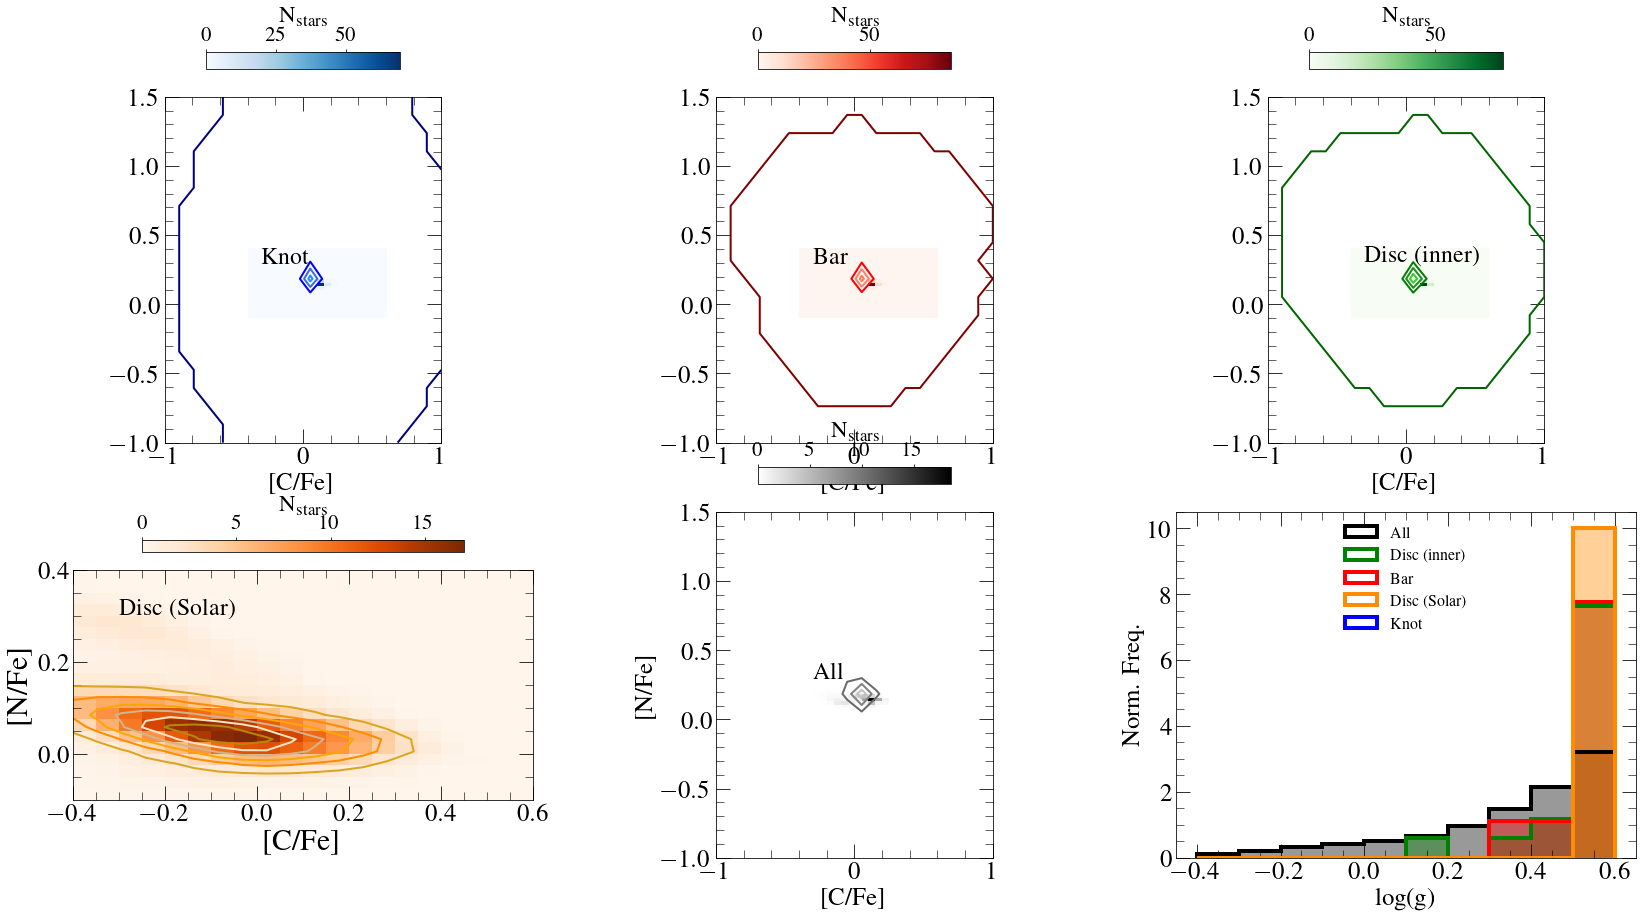

In [282]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(2, 3,figsize=(28,14),facecolor='white')


# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0,0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,0].text(-0.3,0.3,'Knot',fontsize=24)
# axes[0,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
# axes[0,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,0].set_xlabel('[C/Fe]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[0,1].text(-0.3,0.3,'Bar',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[0,1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# axes[0,1].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
# axes[0,1].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].set_xlabel('[C/Fe]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,1].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[0,2].text(-0.3,0.3,'Disc (inner)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[0,2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
# axes[0,2].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
# axes[0,2].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].set_xlabel('[C/Fe]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,2].minorticks_on()

cax = axes[0,2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[0,2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

axes[1,0].text(-0.3,0.3,'Disc (Solar)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# axes[1,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_solar])),fontsize=20)
# axes[1,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_solar])),fontsize=20)
axes[1,0].set_xlabel('[C/Fe]',fontsize=30)
axes[1,0].set_ylabel('[N/Fe]',fontsize=30)
axes[1,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,1].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,1].text(-0.3,0.3,'All',fontsize=24)
axes[1,1].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,1].set_xlabel('[C/Fe]',fontsize=25)
axes[1,1].set_ylabel('[N/Fe]',fontsize=25)
axes[1,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

bins_feh = np.linspace(-0.4,0.6,11)
mask_all = (data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)
# axes[1,2].set_title(r'$|z|$$<$300 pc',fontsize=30)
axes[1,2].hist(data_m['LOGG'][mask_all],bins=bins_feh,histtype='step',color='k',lw=4,density=True,label='All')
axes[1,2].hist(data_m['LOGG'][mask_all],bins=bins_feh,color='k',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_disc],bins=bins_feh,histtype='step',color='g',lw=4,density=True,label='Disc (inner)')
axes[1,2].hist(data_m['LOGG'][mask_disc],bins=bins_feh,color='g',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_bar],bins=bins_feh,histtype='step',color='r',lw=4,density=True,label='Bar')
axes[1,2].hist(data_m['LOGG'][mask_bar],bins=bins_feh,color='r',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_solar],bins=bins_feh,histtype='step',color='darkorange',lw=4,density=True,label='Disc (Solar)')
axes[1,2].hist(data_m['LOGG'][mask_solar],bins=bins_feh,color='darkorange',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_knot],bins=bins_feh,histtype='step',color='b',lw=4,density=True,label='Knot')
axes[1,2].hist(data_m['LOGG'][mask_knot],bins=bins_feh,color='b',alpha=0.4,density=True)
axes[1,2].set_xlabel('log(g)',fontsize=25)
axes[1,2].set_ylabel('Norm. Freq.',fontsize=25)
axes[1,2].legend(loc='upper center',frameon=False,fontsize=16)
axes[1,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,2].minorticks_on()



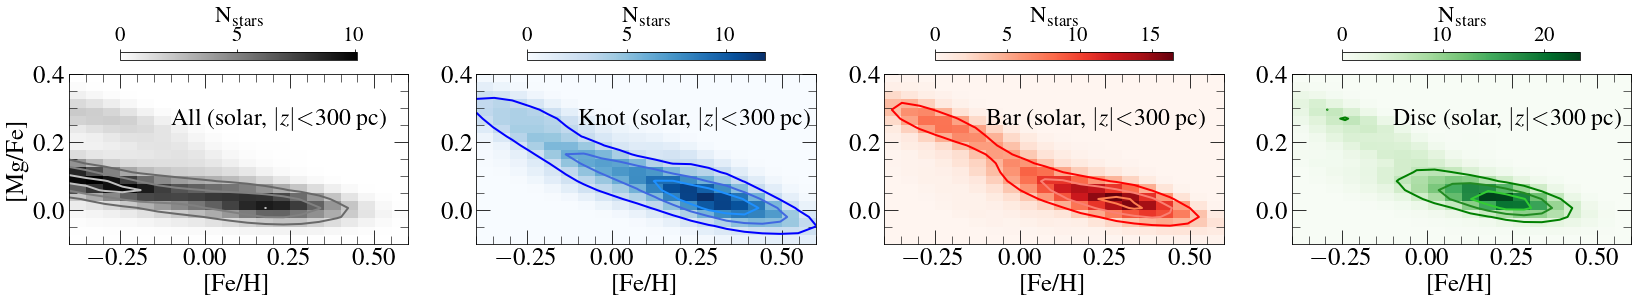

In [194]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].text(-0.1,0.25,'All (solar, $|z|$$<$300 pc)',fontsize=24)
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=25)
axes[0].set_ylabel('[Mg/Fe]',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1].text(-0.1,0.25,'Knot (solar, $|z|$$<$300 pc)',fontsize=24)
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(-0.1,0.25,'Bar (solar, $|z|$$<$300 pc)',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(-0.1,0.25,'Disc (solar, $|z|$$<$300 pc)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [184]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data_m['Zgal']*8.178
Rgal2 = data_m['Rgal']*8.178
fe_disc_solar = data_m['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
mg_disc_solar = data_m['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])


In [185]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


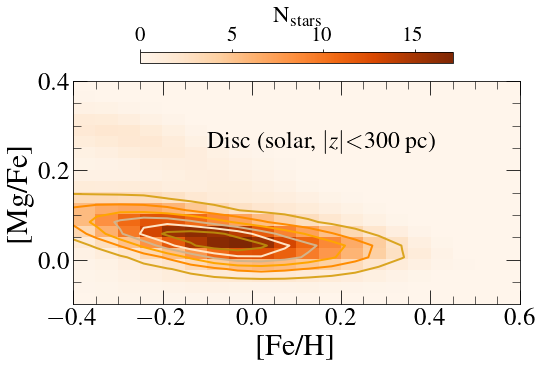

In [189]:
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(1, 1,figsize=(8,6),facecolor='white')


axes.text(-0.1,0.25,'Disc (solar, $|z|$$<$300 pc)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes.imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes.contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes.set_xlabel('[Fe/H]',fontsize=30)
axes.set_ylabel('[Mg/Fe]',fontsize=30)
axes.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes.tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes.minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes.inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes,cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

(-0.2, 0.45)

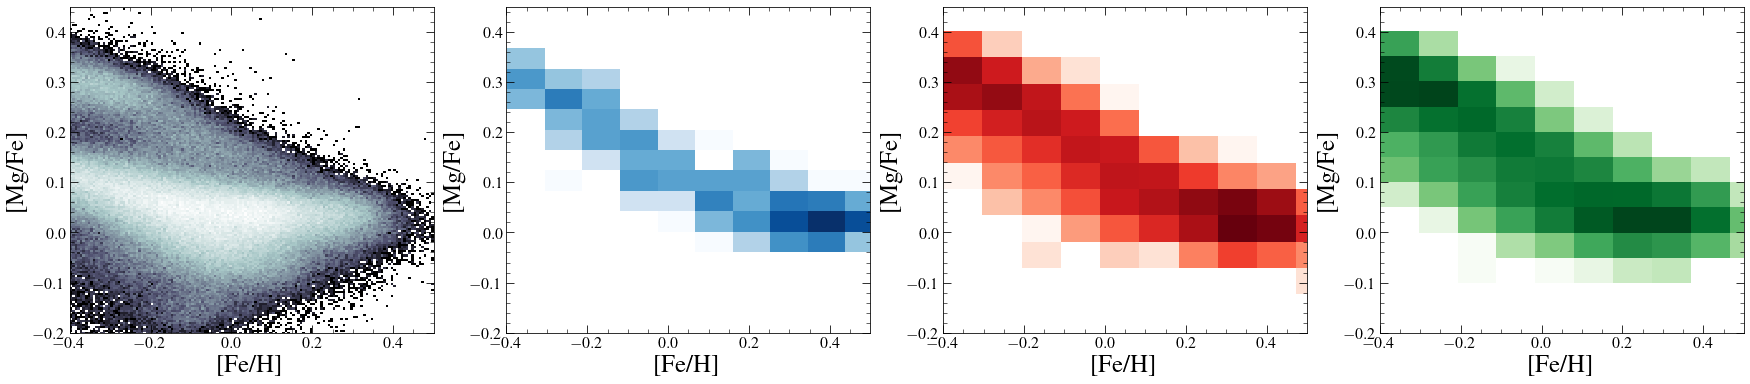

In [171]:
from matplotlib.colors import LogNorm
mask_tot = (data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(data_m['SNR']>100)&(data_m['ecc']<0.6)
plt.figure(figsize=(30,6),facecolor='white')

plt.subplot(1,4,1)
plt.hist2d(data_m['FE_H'][mask_tot],data_m['MG_FE'][mask_tot],bins=500,cmap='bone',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)

plt.subplot(1,4,2)
plt.hist2d(data_m['FE_H'][mask_knot],data_m['MG_FE'][mask_knot],bins=10,cmap='Blues',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)

plt.subplot(1,4,3)
plt.hist2d(data_m['FE_H'][mask_bar],data_m['MG_FE'][mask_bar],bins=10,cmap='Reds',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)

plt.subplot(1,4,4)
plt.hist2d(data_m['FE_H'][mask_disc],data_m['MG_FE'][mask_disc],bins=10,cmap='Greens',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)


In [169]:
print(len(data_m['MG_FE'][mask_knot]))

306


In [25]:
# APOGEE_ID, P_knot, s_knot, P_bar, s_bar, P_disc, s_disc, X, Y, Z, Lx, Ly, Lz

In [27]:

overlapping_ids = np.isin(data2['APOGEE_ID'],data['APOGEE_ID'])
overlapping_ids2 = np.isin(data['APOGEE_ID'],data2['APOGEE_ID'])

Text(0, 0.5, 'L$_{\\mathrm{z},0.5-1.5}$')

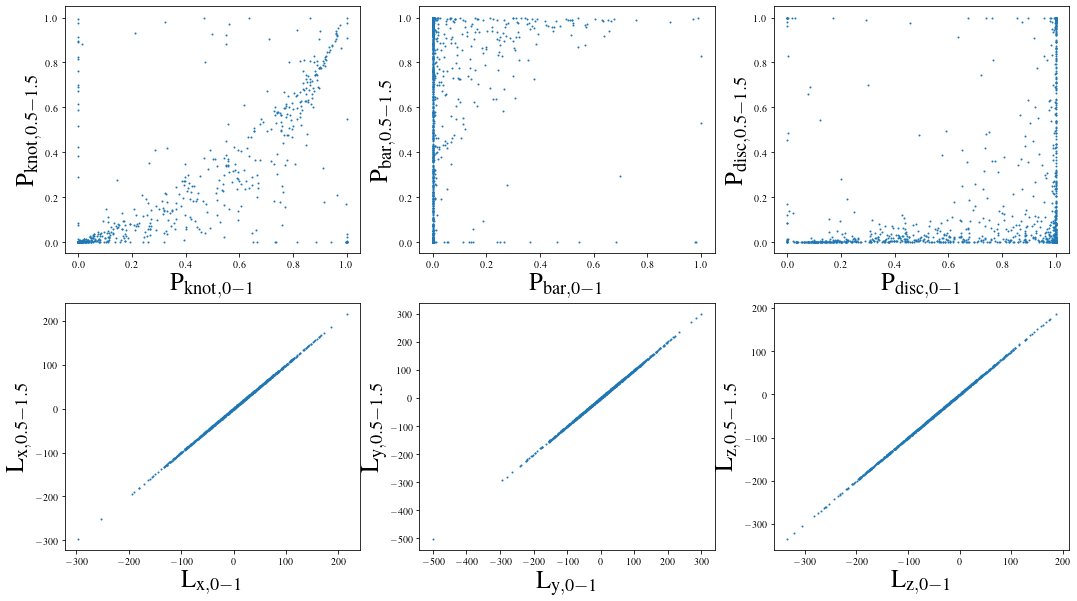

In [30]:
plt.figure(figsize=(18,10),facecolor='white')

plt.subplot(2,3,1)
plt.scatter(data['P_knot'][overlapping_ids2],data2['P_knot'][overlapping_ids],s=1)
plt.xlabel('P$_{\mathrm{knot},0-1}$',fontsize=25)
plt.ylabel('P$_{\mathrm{knot},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,2)
plt.scatter(data['P_bar'][overlapping_ids2],data2['P_bar'][overlapping_ids],s=1)
plt.xlabel('P$_{\mathrm{bar},0-1}$',fontsize=25)
plt.ylabel('P$_{\mathrm{bar},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,3)
plt.scatter(data['P_disc'][overlapping_ids2],data2['P_disc'][overlapping_ids],s=1)
plt.xlabel('P$_{\mathrm{disc},0-1}$',fontsize=25)
plt.ylabel('P$_{\mathrm{disc},0.5-1.5}$',fontsize=25)


plt.subplot(2,3,4)
plt.scatter(data['Lx'][overlapping_ids2],data2['Lx'][overlapping_ids],s=1)
plt.xlabel('L$_{\mathrm{x},0-1}$',fontsize=25)
plt.ylabel('L$_{\mathrm{x},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,5)
plt.scatter(data['Ly'][overlapping_ids2],data2['Ly'][overlapping_ids],s=1)
plt.xlabel('L$_{\mathrm{y},0-1}$',fontsize=25)
plt.ylabel('L$_{\mathrm{y},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,6)
plt.scatter(data['Lz'][overlapping_ids2],data2['Lz'][overlapping_ids],s=1)
plt.xlabel('L$_{\mathrm{z},0-1}$',fontsize=25)
plt.ylabel('L$_{\mathrm{z},0.5-1.5}$',fontsize=25)



In [41]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances

path3 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-1-2.fits'
tb3 = fits.open(path3)
data3 = tb3[1].data 

path4 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-15-25.fits'
tb4 = fits.open(path4)
data4 = tb4[1].data 

In [42]:
overlapping_ids3 = np.isin(data4['APOGEE_ID'],data3['APOGEE_ID'])
overlapping_ids4 = np.isin(data3['APOGEE_ID'],data4['APOGEE_ID'])

In [43]:
print(data4['APOGEE_ID'][overlapping_ids3])
print(data3['APOGEE_ID'][overlapping_ids4])

['2M16140935-2727293' '2M16320345-2939184' '2M16321128-2936500' ...
 '2M19023447-2620230' '2M19024974-2733209' '2M19033725-2708303']
['2M16140935-2727293' '2M16320345-2939184' '2M16321128-2936500' ...
 '2M19023447-2620230' '2M19024974-2733209' '2M19033725-2708303']
